In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# raw_dataset = pd.read_csv("/data/fast0/datasets/glathida-3.1.0/data/T.csv")
# raw_dataset = pd.read_csv("~/notebooks/glac/data/TTT.csv")
raw_dataset = pd.read_csv("~/stuff/coding/glacier/glac/data/T.csv")

dataset = raw_dataset.copy()

#examine missing data
# dataset.head()

2.6.0


In [2]:
#drop everything but lat, long, elevation, thickness

dataset = dataset.drop("GlaThiDa_ID", axis=1)
dataset = dataset.drop("GLACIER_DB", axis=1)
dataset = dataset.drop("POLITICAL_UNIT", axis=1)
dataset = dataset.drop("GLACIER_ID", axis=1)
dataset = dataset.drop("GLACIER_NAME", axis=1)
dataset = dataset.drop("SURVEY_DATE", axis=1)
dataset = dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
dataset = dataset.drop("MAXIMUM_THICKNESS", axis=1)
dataset = dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
dataset = dataset.drop("DATA_FLAG", axis=1)
dataset = dataset.drop("ELEVATION_DATE", axis=1)
dataset = dataset.drop("SPONSORING_AGENCY", axis=1)
dataset = dataset.drop("REMARKS", axis=1)
dataset = dataset.drop("SURVEY_METHOD_DETAILS", axis=1)
dataset = dataset.drop("SURVEY_METHOD", axis=1)
dataset = dataset.drop("NUMBER_OF_SURVEY_POINTS", axis=1)
dataset = dataset.drop("NUMBER_OF_SURVEY_PROFILES", axis=1)
dataset = dataset.drop("TOTAL_LENGTH_OF_SURVEY_PROFILES", axis=1)
dataset = dataset.drop("INTERPOLATION_METHOD", axis=1)
dataset = dataset.drop("INVESTIGATOR", axis=1)
dataset = dataset.drop("REFERENCES", axis=1)

#sum up rows with empty cells
dataset.isna().sum()

#drop the remaining null pieces from elevation
dataset = dataset.dropna()
dataset.isna().sum()

LAT               0
LON               0
AREA              0
MEAN_SLOPE        0
MEAN_THICKNESS    0
dtype: int64

In [3]:
dataset

,LAT,LON,AREA,MEAN_SLOPE,MEAN_THICKNESS
32,48.750000,-121.830000,2.900,0.0,58.0
33,58.380000,-134.360000,11.700,0.0,66.0
34,50.061340,87.697410,5.150,0.0,56.0
35,50.049670,87.745520,2.840,0.0,86.0
36,50.080080,87.690250,5.950,0.0,90.0
...,...,...,...,...,...
620,78.245480,16.064380,2.100,13.0,32.0
628,43.043653,77.080587,2.610,20.0,47.0
632,77.971400,14.069100,6.737,6.0,65.0
749,77.027200,15.485400,0.370,19.0,27.0


# 

In [4]:
#split the dataset and reserve some to test what was trained.
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

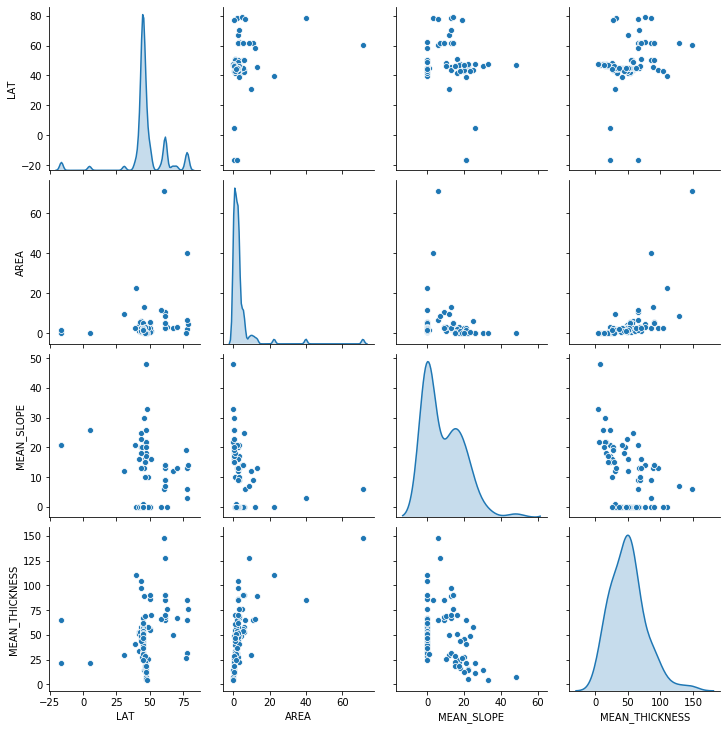

In [5]:
sns.pairplot(train_dataset[["LAT", "AREA", "MEAN_SLOPE", "MEAN_THICKNESS"]], diag_kind='kde')

In [6]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LAT,89.0,47.465341,14.458029,-16.3023,44.584600,45.080000,48.75000,78.87100
LON,89.0,41.704321,55.546192,-134.3600,8.602228,78.176022,79.82588,140.86536
AREA,89.0,4.060882,8.853776,0.0264,1.000000,2.100000,3.22750,71.30000
MEAN_SLOPE,89.0,8.797753,10.230502,0.0000,0.000000,6.000000,16.00000,48.00000
MEAN_THICKNESS,89.0,50.460674,27.011806,4.0000,30.000000,49.000000,65.00000,148.00000


In [7]:
#separate out features - what will be trained to predict desired attribute
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#define label - attribute training to be picked
train_labels = train_features.pop("MEAN_THICKNESS")
test_labels = test_features.pop("MEAN_THICKNESS")

train_features.describe().transpose()[['mean', 'std']]

,mean,std
LAT,47.465341,14.458029
LON,41.704321,55.546192
AREA,4.060882,8.853776
MEAN_SLOPE,8.797753,10.230502


# Establish normalization layers

In [8]:
#build normalizer layers for each model to be run

normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

area = np.array(train_features["AREA"])
area_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
area_normalizer.adapt(area)

lat = np.array(train_features["LAT"])
lat_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
lat_normalizer.adapt(lat)

lon = np.array(train_features["LON"])
lon_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
lon_normalizer.adapt(lon)

slope = np.array(train_features["MEAN_SLOPE"])
slope_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
slope_normalizer.adapt(slope)

# build model function to call

In [9]:
# #how to condense model into callable function with fillable variables? even possible?
# #worry about the model for now, leave plots for later



# VARIABLE_model = tf.keras.Sequential([
#     VARIABLE_normalizer,
#     layers.Dense(1)
# ])


# VARIABLE_model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.1),
#     loss="mean_absolute_error")

# %%time
# VARIABLE_history = VARIABLE_model.fit(
#     train_features["VARIABLE"], train_labels,
#     epochs=400,
#     # suppress logging
#     verbose=0,
#     # Calculate validation results on 20% of the training data
#     validation_split = 0.2)

# test_results = {}
# test_results["VARIABLE_model"] = VARIABLE_model.evaluate(
#     test_features["VARIABLE"],
#     test_labels, verbose=0)

# test_results

# # def plot_area(x, y):
# #     plt.scatter(train_features["VARIABLE"], train_labels, label='Data')
# #     plt.plot(x, y, color='k', label='Predictions')
# #     plt.xlabel('VARIABLE')
# #     plt.ylabel('Thickness')
# #     plt.xlim((0,20))
# #     plt.legend()
    
# # x = tf.linspace(0.0, 20, 101)
# # y = VARIABLE_model.predict(x)
# # plot_area(x,y)

# # def plot_loss(area_history):
# #   plt.plot(VARIABLE_history.history['loss'], label='loss')
# #   plt.plot(VARIABLE_history.history['val_loss'], label='val_loss')
# # #   plt.ylim([0, 10])
# #   plt.xlabel('Epoch')
# #   plt.ylabel('Error')
# #   plt.legend()
# #   plt.grid(True)
# # plot_loss(VARIABLE_history)



# Linear regression with area

In [10]:
# original flavor
area_model = tf.keras.Sequential([
    area_normalizer,
    layers.Dense(1)
])

area_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss="mean_absolute_error")

area_history = area_model.fit(
    train_features["AREA"], train_labels,
    epochs=1000,
    verbose=0,
    validation_split = 0.2)

test_results = {}
test_results['area_model'] = area_model.evaluate(
    test_features['AREA'],
    test_labels, verbose=0)

test_results

{'area_model': 69.78414916992188}

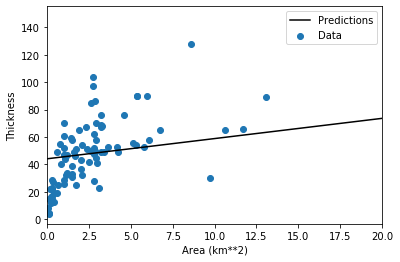

In [11]:
def plot_area(x, y):
    plt.scatter(train_features['AREA'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Area (km**2)')
    plt.ylabel('Thickness')
    plt.xlim((0,20))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = area_model.predict(x)
plot_area(x,y)

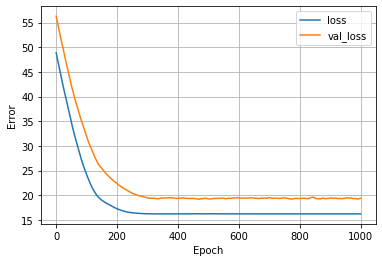

In [12]:
def plot_loss(area_history):
  plt.plot(area_history.history['loss'], label='loss')
  plt.plot(area_history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(area_history)


In [13]:
#increasing learning rate
area_model = tf.keras.Sequential([
    area_normalizer,
    layers.Dense(1)
])

area_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.15),
    loss="mean_absolute_error")

area_history = area_model.fit(
    train_features["AREA"], train_labels,
    epochs=1000,
    verbose=0,
    validation_split = 0.2)

test_results = {}
test_results['area_model'] = area_model.evaluate(
    test_features['AREA'],
    test_labels, verbose=0)

test_results

{'area_model': 70.93527221679688}

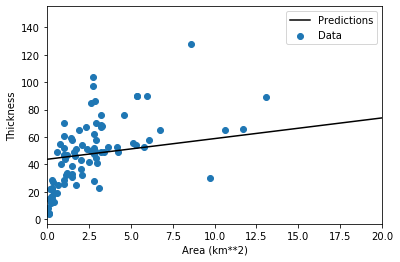

In [14]:
def plot_area(x, y):
    plt.scatter(train_features['AREA'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Area (km**2)')
    plt.ylabel('Thickness')
    plt.xlim((0,20))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = area_model.predict(x)
plot_area(x,y)

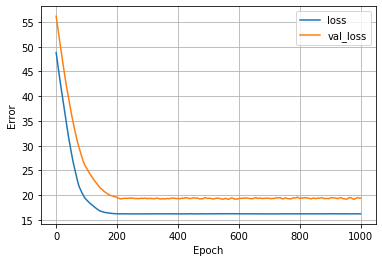

In [15]:
def plot_loss(area_history):
  plt.plot(area_history.history['loss'], label='loss')
  plt.plot(area_history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(area_history)

In [16]:
#increasing validation split
area_model = tf.keras.Sequential([
    area_normalizer,
    layers.Dense(1)
])

area_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss="mean_absolute_error")

area_history = area_model.fit(
    train_features["AREA"], train_labels,
    epochs=1000,
    verbose=0,
    validation_split = 0.4)

test_results = {}
test_results['area_model'] = area_model.evaluate(
    test_features['AREA'],
    test_labels, verbose=0)

test_results

{'area_model': 136.53965759277344}

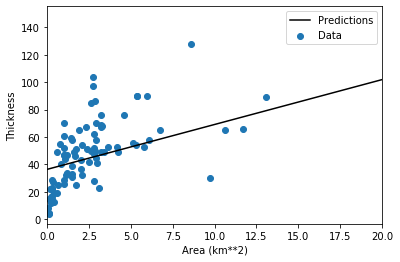

In [17]:
def plot_area(x, y):
    plt.scatter(train_features['AREA'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Area (km**2)')
    plt.ylabel('Thickness')
    plt.xlim((0,20))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = area_model.predict(x)
plot_area(x,y)

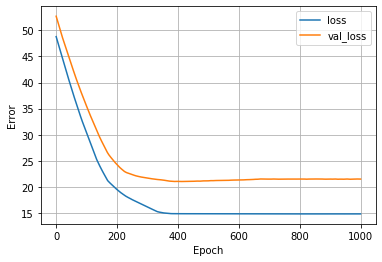

In [18]:
def plot_loss(area_history):
  plt.plot(area_history.history['loss'], label='loss')
  plt.plot(area_history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(area_history)

In [19]:
#increase learning rate w/ decrease validation split
area_model = tf.keras.Sequential([
    area_normalizer,
    layers.Dense(1)
])

area_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.2),
    loss="mean_absolute_error")

area_history = area_model.fit(
    train_features["AREA"], train_labels,
    epochs=1000,
    verbose=0,
    validation_split = 0.1)

test_results = {}
test_results['area_model'] = area_model.evaluate(
    test_features['AREA'],
    test_labels, verbose=0)

test_results

{'area_model': 70.18080139160156}

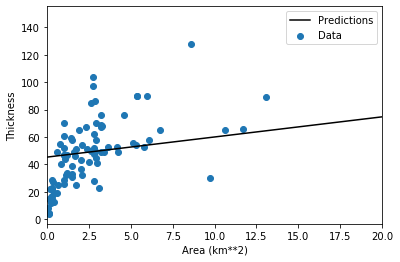

In [20]:
def plot_area(x, y):
    plt.scatter(train_features['AREA'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Area (km**2)')
    plt.ylabel('Thickness')
    plt.xlim((0,20))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = area_model.predict(x)
plot_area(x,y)

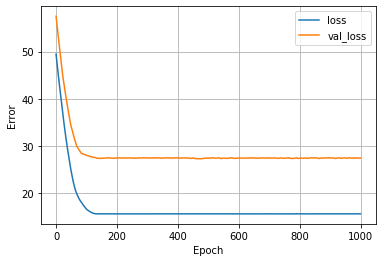

In [21]:
def plot_loss(area_history):
  plt.plot(area_history.history['loss'], label='loss')
  plt.plot(area_history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(area_history)

In [22]:
#decrease learning rate w/ increase validation split
area_model = tf.keras.Sequential([
    area_normalizer,
    layers.Dense(1)
])

area_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.05),
    loss="mean_absolute_error")

area_history = area_model.fit(
    train_features["AREA"], train_labels,
    epochs=1000,
    verbose=0,
    validation_split = 0.25)

test_results = {}
test_results['area_model'] = area_model.evaluate(
    test_features['AREA'],
    test_labels, verbose=0)

test_results

{'area_model': 124.88224792480469}

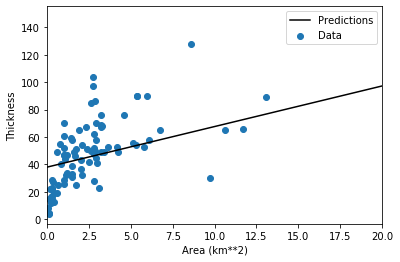

In [23]:
def plot_area(x, y):
    plt.scatter(train_features['AREA'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Area (km**2)')
    plt.ylabel('Thickness')
    plt.xlim((0,20))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = area_model.predict(x)
plot_area(x,y)

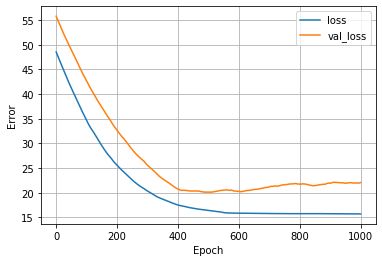

In [24]:
def plot_loss(area_history):
  plt.plot(area_history.history['loss'], label='loss')
  plt.plot(area_history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(area_history)

# Linear regression with latitude

In [25]:
#build elevation model with Sequential
lat_model = tf.keras.Sequential([
    lat_normalizer,
    layers.Dense(1)
])

lat_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss="mean_absolute_error")

lat_history = lat_model.fit(
    train_features["LAT"], train_labels,
    epochs=400,
    verbose=0,
    validation_split = 0.2)

test_results["lat_model"] = lat_model.evaluate(
    test_features["LAT"],
    test_labels, verbose=0)

test_results

{'area_model': 124.88224792480469, 'lat_model': 27.2119083404541}

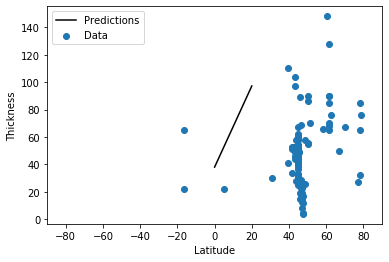

In [26]:
def plot_latitude(x, y):
    plt.scatter(train_features["LAT"], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel("Latitude")
    plt.ylabel('Thickness')
    plt.xlim((-90,90))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = area_model.predict(x)
plot_latitude(x,y)

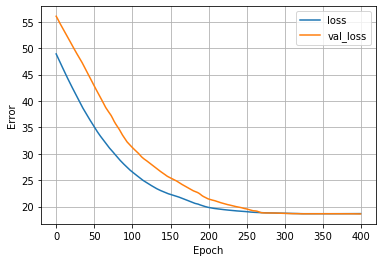

In [27]:
plot_loss(lat_history)

# Linear regression with longitude

In [28]:
lon_model = tf.keras.Sequential([
    lon_normalizer,
    layers.Dense(1)
])

lon_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.05),
    loss="mean_absolute_error")

lon_history = lon_model.fit(
    train_features["LON"], train_labels,
    epochs=800,
    verbose=0,
    validation_split = 0.25)

test_results["lon_model"] = lon_model.evaluate(
    test_features["LON"],
    test_labels, verbose=0)

test_results

{'area_model': 124.88224792480469,
 'lat_model': 27.2119083404541,
 'lon_model': 29.3345947265625}

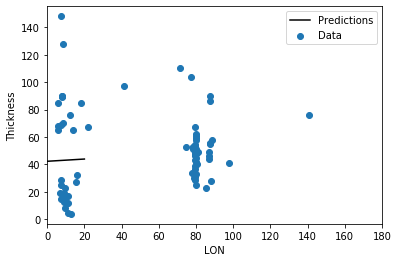

In [29]:
def plot_longitude(x, y):
    plt.scatter(train_features["LON"], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('LON')
    plt.ylabel('Thickness')
    plt.xlim((0,180))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = lon_model.predict(x)
plot_longitude(x,y)

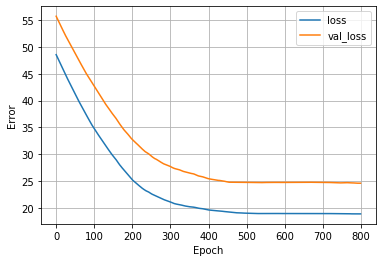

In [30]:
plot_loss(lon_history)

# Linear regression with slope

In [31]:
slope_model = tf.keras.Sequential([
    slope_normalizer,
    layers.Dense(1)
])

slope_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss="mean_absolute_error")

slope_history = slope_model.fit(
    train_features["MEAN_SLOPE"], train_labels,
    epochs=700,
    verbose=0,
    validation_split = 0.2)

test_results["slope_model"] = slope_model.evaluate(
    test_features["MEAN_SLOPE"],
    test_labels, verbose=0)

test_results

{'area_model': 124.88224792480469,
 'lat_model': 27.2119083404541,
 'lon_model': 29.3345947265625,
 'slope_model': 24.33148765563965}

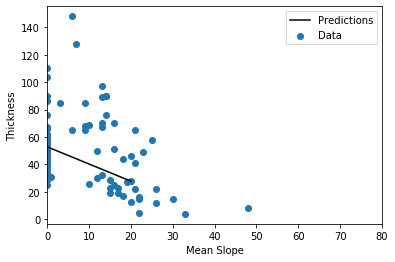

In [32]:
def plot_slope(x, y):
    plt.scatter(train_features["MEAN_SLOPE"], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Mean Slope')
    plt.ylabel('Thickness')
    plt.xlim((0,80))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = slope_model.predict(x)
plot_slope(x,y)

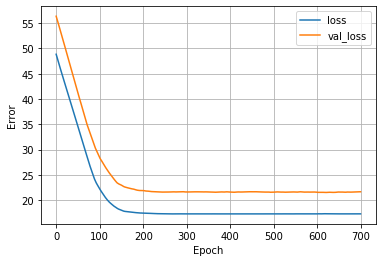

In [33]:
plot_loss(slope_history)

# Multiple inputs

In [34]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
multi_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [35]:
multi_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [36]:
%%time
history_multi = multi_model.fit(
    train_features, train_labels, 
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 14.5 s, sys: 663 ms, total: 15.1 s
Wall time: 13.1 s


In [37]:
#not sure what exactly is going on here but I'm sure this is what needs tweaking
test_results["multi_model"] = multi_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

{'area_model': 124.88224792480469,
 'lat_model': 27.2119083404541,
 'lon_model': 29.3345947265625,
 'slope_model': 24.33148765563965,
 'multi_model': 46.6635627746582}

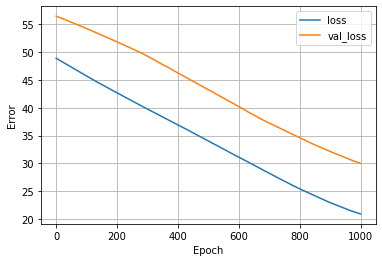

In [38]:
plot_loss(history_multi)

# DNN regression

### Single variable

In [39]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))
  return model

In [40]:
dnn_area_model = build_and_compile_model(area_normalizer)

In [41]:
dnn_area_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [42]:
%%time
history_dnn = dnn_area_model.fit(
    train_features["AREA"], train_labels,
    validation_split=0.2,
    #verbose=0,
    epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 48ms/step - loss: 48.8882 - val_loss: 56.4700
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 48.8811 - val_loss: 56.4646
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 48.8742 - val_loss: 56.4591
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 48.8670 - val_loss: 56.4535
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 48.8600 - val_loss: 56.4479
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 48.8526 - val_loss: 56.4422
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 48.8459 - val_loss: 56.4365
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 48.8380 - val_loss: 56.4307
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 48.8309 - val_loss: 56.4248
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 48.8238 - val_loss: 56.4190


3/3 [==============================] - 0s 10ms/step - loss: 48.0469 - val_loss: 55.7774
Epoch 83/100
3/3 [==============================] - 0s 9ms/step - loss: 48.0304 - val_loss: 55.7635
Epoch 84/100
3/3 [==============================] - 0s 10ms/step - loss: 48.0136 - val_loss: 55.7494
Epoch 85/100
3/3 [==============================] - 0s 10ms/step - loss: 47.9980 - val_loss: 55.7348
Epoch 86/100
3/3 [==============================] - 0s 9ms/step - loss: 47.9797 - val_loss: 55.7196
Epoch 87/100
3/3 [==============================] - 0s 9ms/step - loss: 47.9623 - val_loss: 55.7041
Epoch 88/100
3/3 [==============================] - 0s 9ms/step - loss: 47.9435 - val_loss: 55.6883
Epoch 89/100
3/3 [==============================] - 0s 10ms/step - loss: 47.9250 - val_loss: 55.6720
Epoch 90/100
3/3 [==============================] - 0s 9ms/step - loss: 47.9060 - val_loss: 55.6555
Epoch 91/100
3/3 [==============================] - 0s 10ms/step - loss: 47.8863 - val_loss: 55.6387
Epoch 92

In [43]:
x = tf.linspace(0.0, 250, 251)
y = dnn_area_model.predict(x)

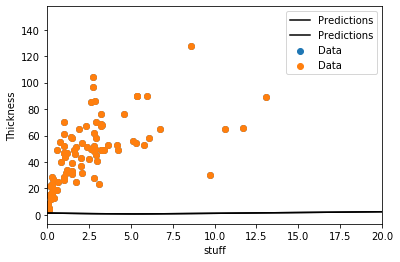

In [44]:

def plot_area(x, y):
    plt.scatter(train_features["AREA"], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('stuff')
    plt.ylabel('Thickness')
    plt.xlim((0,20))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = dnn_area_model.predict(x)
plot_area(x,y)




plot_area(x, y)

In [45]:
dnn_test_results = {}
dnn_test_results['dnn_area_model'] = dnn_area_model.evaluate(
    test_features["AREA"], test_labels,
    verbose=0)

# Full model (not-quite-working)

In [46]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
dnn_full_model = build_and_compile_model(normalizer)
dnn_full_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_6 (Normalizati (None, 4)                 9         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,554
Trainable params: 4,545
Non-trainable params: 9
_________________________________________________________________


In [47]:
%%time
history_full = dnn_full_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 1.87 s, sys: 106 ms, total: 1.98 s
Wall time: 1.71 s


In [48]:
x = tf.linspace(0.0, 250, 251)
y = dnn_full_model.predict(x)

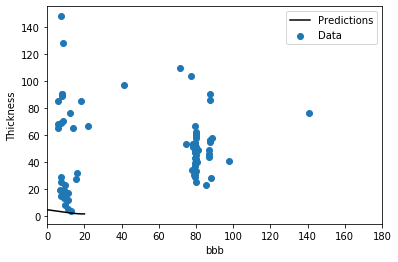

In [49]:
def plot_thickness(x, y):
    plt.scatter(train_features["LON"], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('bbb')
    plt.ylabel('Thickness')
    plt.xlim((0,180))
    plt.legend()
    
x = tf.linspace(0.0, 20, 101)
y = dnn_full_model.predict(x)
# plot_elevation(x,y)




plot_thickness(x, y)

In [50]:
test_results["dnn_full_model"] = dnn_full_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

{'area_model': 124.88224792480469,
 'lat_model': 27.2119083404541,
 'lon_model': 29.3345947265625,
 'slope_model': 24.33148765563965,
 'multi_model': 46.6635627746582,
 'dnn_full_model': 45.70526885986328}

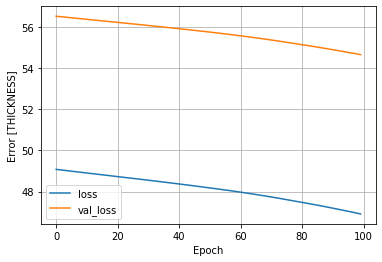

In [51]:
def plot_loss(history_full):
  plt.plot(history_full.history['loss'], label='loss')
  plt.plot(history_full.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [THICKNESS]')
  plt.legend()
  plt.grid(True)
plot_loss(history_full)